In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

obs_df = pd.read_csv('observations.csv')
spe_df = pd.read_csv('species_info.csv')
rows_obs = obs_df.shape[0]

grouped_df = obs_df.groupby('park_name').sum().reset_index()
park_names = list(grouped_df['park_name'])

final_df = pd.DataFrame()

# #Finding the animal with the most observation in the park
# #Running a loop to clear all duplicates
for name in park_names:
     df = obs_df[obs_df['park_name'] == name]
     new_df = df.drop_duplicates()
     final_df = pd.concat([final_df,new_df])

rows_fin = final_df.shape[0]

print('The number of rows removed due to duplicate entries are ' + str(rows_obs-rows_fin) )

The number of rows removed due to duplicate entries are 15


                             park_name  observations
0                  Bryce National Park        575901
1  Great Smoky Mountains National Park        431378
2            Yellowstone National Park       1442314
3               Yosemite National Park        862836


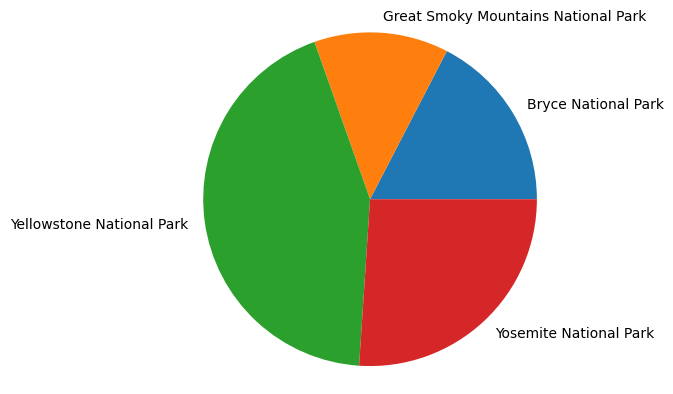

<Figure size 640x480 with 0 Axes>

In [67]:
park_df = final_df.iloc[:,[1,2]]

#Grouping park_df by the 4 different parks
group_parkdf = park_df.groupby('park_name').sum().reset_index()
print(group_parkdf)

plt.pie(group_parkdf.observations, labels = group_parkdf.park_name)
plt.axis('equal')
plt.savefig('NationalParks.png')
plt.show()
plt.clf()

In [68]:
#Number of total species
unique_species = final_df.scientific_name.nunique()
print('There are a total of ' + str(unique_species) + ' species observed in all 4 National parks')

There are a total of 5541 species observed in all 4 National parks


In [69]:
#Most observed in all of the df
#Least observed in all of the df

#Animal with the most number of observations in the entire dataframe
most_animal = (list((final_df[final_df.observations == final_df.observations.max()]).scientific_name))[0]
most_an_park = (list((final_df[final_df.observations == final_df.observations.max()]).park_name))[0]

#Animal with the least number of observations in the entire dataframe
least_animal = (list((final_df[final_df.observations == final_df.observations.min()]).scientific_name))[0]
least_an_park = (list((final_df[final_df.observations == final_df.observations.min()]).park_name))[0]

#Finding the common name
most_cn = (list(spe_df[spe_df.scientific_name == most_animal].common_names))[0]
least_cn = (list(spe_df[spe_df.scientific_name == least_animal].common_names))[0]

print(f'The most found organism is \'{most_cn}\' with the scientific name \'{most_animal}\', found in {most_an_park} with a total observation of {final_df.observations.max()}')
print(f'The least found organism is \'{least_cn}\' with the scientific name \'{least_animal}\', found in {least_an_park} with a total observation of {final_df.observations.min()}')


The most found organism is 'Deep-Root Clubmoss, Ground Cedar' with the scientific name 'Lycopodium tristachyum', found in Yellowstone National Park with a total observation of 321
The least found organism is 'Golden Corydalis, Scrambled Eggs' with the scientific name 'Corydalis aurea', found in Bryce National Park with a total observation of 9


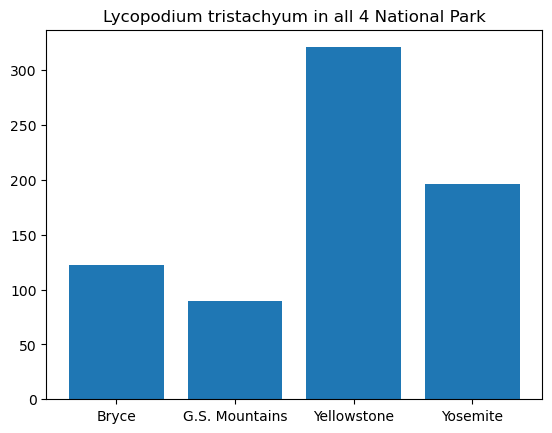

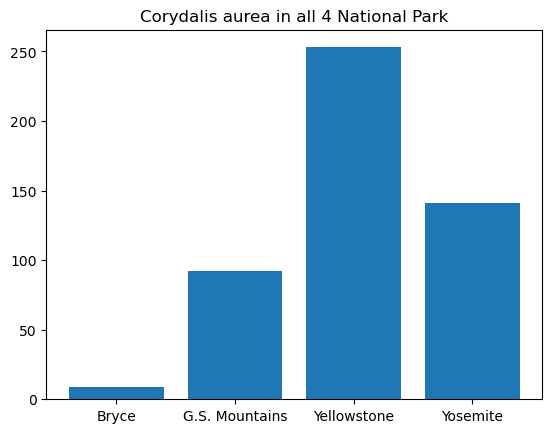

In [70]:
#How many times in each of the 4 parks

most_df = pd.DataFrame()
least_df = pd.DataFrame()

most_df = final_df[final_df.scientific_name == most_animal].reset_index()
most_df = most_df.iloc[:,[2,3]]
plt.bar(range(len(most_df)), most_df.observations)
ax = plt.subplot()
ax.set_xticks(range(len(most_df)))
ax.set_xticklabels(['Bryce','G.S. Mountains', 'Yellowstone', 'Yosemite'], rotation =0)
plt.title(f'{most_animal} in all 4 National Park')
plt.savefig(f'{most_animal}.jpg')
plt.show()

least_df = final_df[final_df.scientific_name == least_animal].reset_index()
least_df = least_df.iloc[:,[2,3]]
plt.bar(range(len(least_df)), least_df.observations)
ax = plt.subplot()
ax.set_xticks(range(len(most_df)))
ax.set_xticklabels(['Bryce','G.S. Mountains', 'Yellowstone', 'Yosemite'], rotation =0)
plt.title(f'{least_animal} in all 4 National Park')
plt.savefig(f'{least_animal}.jpg')
plt.show()


In [44]:
#Finding the most in all national parks

def most_least_species(park, end):
    
    if park in park_names:
        df_fun = final_df[final_df['park_name'] == park]
        if end == 'most':
            most_obs = df_fun.observations.max()
            most_ap = (list(df_fun[df_fun.observations == most_obs].scientific_name))[0]
            print(f'The most found living being in {park} is {most_ap} with an observation value of {most_obs}')

        elif end == 'least':
            least_obs = df_fun.observations.min()
            least_ap = (list(df_fun[df_fun.observations == least_obs].scientific_name))[0]
            print(f'The most found living being in {park} is {least_ap} with an observation value of {least_obs}')

        else: 
            print("Can't match")
        #return species

end_list = ['most','least']

for end in end_list:
    print(end)
    for name in park_names:
        most_least_species(name, end)


most
The most found living being in Bryce National Park is Valerianella radiata with an observation value of 176
The most found living being in Great Smoky Mountains National Park is Sonchus asper ssp. asper with an observation value of 147
The most found living being in Yellowstone National Park is Lycopodium tristachyum with an observation value of 321
The most found living being in Yosemite National Park is Ivesia shockleyi var. shockleyi with an observation value of 223
least
The most found living being in Bryce National Park is Corydalis aurea with an observation value of 9
The most found living being in Great Smoky Mountains National Park is Collomia tinctoria with an observation value of 10
The most found living being in Yellowstone National Park is Grus americana with an observation value of 57
The most found living being in Yosemite National Park is Noturus baileyi with an observation value of 31


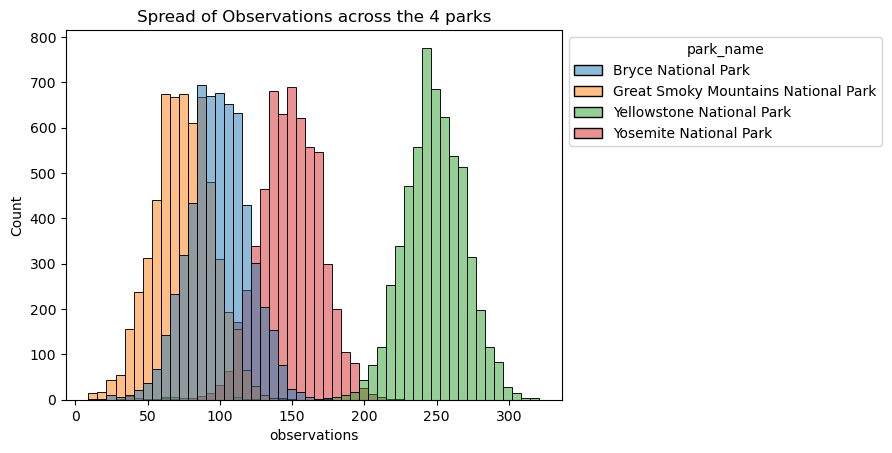

<Figure size 640x480 with 0 Axes>

In [149]:
ax = sns.histplot(data=final_df, x='observations', hue='park_name', bins=50)
plt.title('Spread of Observations across the 4 parks')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
plt.savefig('Park_Spread.png')
plt.show()
plt.clf()


